In [1]:


%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Exercise1 (ODE) 

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_1<\cdots<t_{N-1}<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider the initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = F(y, t),      & \quad \text{on } [a, b]\\\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(t_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,H,$ and $F$ and return array of all $t_k$ and $y_k$ of \eqref{eul2} using Euler method i.e.
$$ y_{k+1} = y_k + HF(y_k, t_k) $$

In [234]:
import numpy as np
from matplotlib import pyplot as plt
def EulerMethod(a,b,c,H,F):
    N = ((b-a)/H)+1
    t = np.linspace(a,b,int(N))
    y=np.zeros([len(t),len(c)])
    y[a] = c
    for k in range(len(t)-1):
        y[k+1] = y[k] + H*F(y[k],t[k])
    return t,y

2. Write a python function <b> EulerMethodModif </b> that takes $a,b,c,H,$ and $F$ and return array of all $t_k$ and $y_k$ of (1) using the modified implicit euler method i.e.
\begin{equation*}
\begin{cases}
\alpha = HF(y_k, t_k)\\\\
\beta = HF(y_k + \alpha, t_k +H)\\\\
y_{k+1} = y_k + \dfrac{\alpha + \beta}{2}
\end{cases}
\end{equation*}


In [235]:
def EulerMethodModif(a,b,c,H,F):
    N = ((b-a)/H)+1
    t = np.linspace(a,b,int(N))
    y=np.zeros([len(t),len(c)])
    y[a] = c
    for k in range(len(t)-1):
        alpha = H*F(y[k],t[k])
        beta = H*F(y[k]+alpha,t[k]+H)
        y[k+1] = y[k] + (alpha+beta)/2
    return t,y

3. Let us consider the initial value problem 

\begin{equation*}
  \begin{cases}
    z'' = 6z' -5z,      & \quad \text{on } [0, 1]\\\\
    z(0) = 1, z'(0) = 3
  \end{cases}\quad \quad (2)
\end{equation*}
Using the characteristic equation, find and type the exact solution of the second order ODE (2) in the Markdown cell below. 


$$ z(t)= \frac{1}{2}e^{t}+\frac{1}{2}e^{5t} $$

4. Define in the Code cell below the function $F$ such that the second order ODE (2) is equivalent to the first order ODE (1)

In [236]:
def F(y,t):
    [x,z] = y
    dxdt = 6*x - 5*z
    dzdt = x
    return np.array([dxdt,dzdt])

5. Compare graphically the exact and numerical solution of (2) using <b> odeint </b>

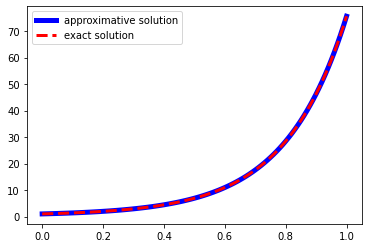

In [242]:
from scipy.integrate import odeint
y0 = [3,1]
H=0.01
N=((b-a)/H)+1
t=np.linspace(0,1,int(N))
sol_ap = odeint(F,y0,t)
z = sol_ap[:,1]
z_exact = (1/2)*np.exp(t) + (1/2)*np.exp(5*t)

plt.subplot(1,1,1)
plt.plot(t,z,'b',linewidth=5)
plt.plot(t,z_exact,'r--',linewidth = 3)
plt.legend(['approximative solution','exact solution'])
plt.show()

6. Compare graphically the exact and numerical solution of (2) using <b> EulerMethod </b>

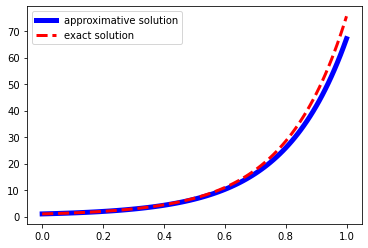

In [243]:
a=0
b=1
c=[3,1]
H=0.01
sol = EulerMethod(a,b,c,H,F)[1][:,1]
z_exact = (1/2)*np.exp(t) + (1/2)*np.exp(5*t)

plt.subplot(1,1,1)
plt.plot(t,sol,'b',linewidth=5)
plt.plot(t,z_exact,'r--',linewidth = 3)
plt.legend(['approximative solution','exact solution'])
plt.show()

7. Compare graphically the exact and numerical solution of (2) using <b> EulerMethodModif </b>

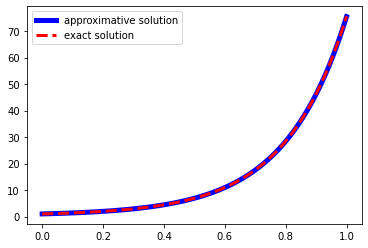

In [244]:
sol1 = EulerMethodModif(a,b,c,H,F)[1][:,1]
z_exact = (1/2)*np.exp(t) + (1/2)*np.exp(5*t)

plt.subplot(1,1,1)
plt.plot(t,sol1,'b',linewidth=5)
plt.plot(t,z_exact,'r--',linewidth = 3)
plt.legend(['approximative solution','exact solution'])
plt.show()

8. Which method give a better approximation of the exact solution? Why?

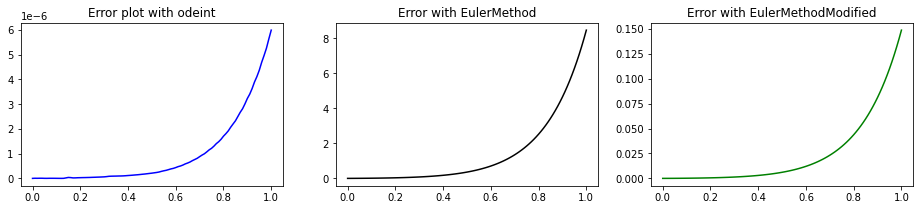

In [245]:
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
plt.plot(t,abs(z_exact-z),'b')
plt.title('Error plot with odeint')
plt.subplot(1,3,2)
plt.plot(t,abs(z_exact-z1),'k')
plt.title('Error with EulerMethod')
plt.subplot(1,3,3)
plt.plot(t,abs(z_exact-z2),'g')
plt.title('Error with EulerMethodModified')
plt.show()

According to these plots, we can say are able to say that the $$\textbf{odeint method}$$ give the best approximation of the solution because the it has the smallest of magnitude of the error

# Exercise 2 (Probability and statistics) 

Let $X$ be Binomial r.v. with parameter $(n,p)$ and $Y$ be a Poisson r.v. with parameter $\lambda$.
Under some conditions on $n$, $p$ and $\lambda$, the binomial distribution can be approximated by the Poisson distribution which can be itself approximated by a gaussian distribution.
The goal of the exercise is to experiment these conditions empirically.

In [108]:
from scipy.stats import norm, poisson, binom
#norm,poisson,binom can be used for normal, poisson and binomial distr. (resp)

1. Represent the bar plot of $P(X=x)$ for $x=0,1,\ldots,n$  with $n=25$ and $p = 0.1$


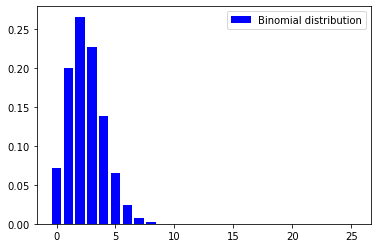

In [183]:
n=25
x = np.linspace(0,25,26)
p = 0.1
pmf1 = binom.pmf(x,n,p)
plt.bar(x,pmf1,color='b',label='Binomial distribution')
plt.legend()
plt.show()

2. Represent the bar plot of $P(Y=y)$ for $y \in \mathbb{N}$. Choose an appropriate value for $\lambda$ relying on $n$ and $p$ such that $P(Y=y)$ is 
an approximation of $P(X=x)$.


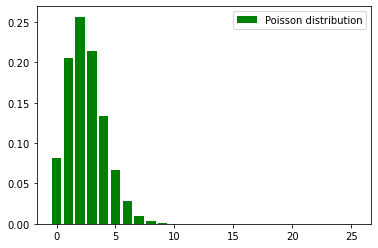

In [184]:
mu = 2.5
n=25
x = np.linspace(0,25,26)
pmf2 = poisson.pmf(x,mu,loc=0)
plt.bar(x,pmf2,color='g',label='Poisson distribution')
plt.legend()
plt.show()

3. Represent a comparison bar plot of $P(X=x)$ and $P(Y=y)$.

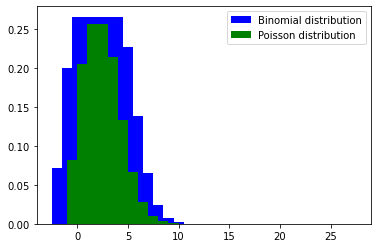

In [192]:
plt.bar(x+0.00,pmf1,color='b',label='Binomial distribution',width=5)
plt.bar(x+0.00,pmf2,color='g',label='Poisson distribution',width = 2)
plt.legend()

4. Fit a normal distribution on $P(Y=y)$ by drawing a bell curve on $P(Y=y)$. Hint: choose the appropriate expectation and variance of the normal distribtion (Note that $E[Y] = Var[Y] = \lambda$) 

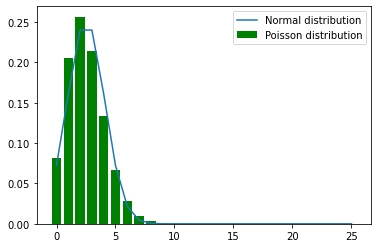

In [193]:
pmf3=norm(2.5,np.sqrt(2.5))
N=pmf3.pdf(x)
plt.plot(x,N,label='Normal distribution')
plt.bar(x,pmf2,color='g',label='Poisson distribution')
plt.legend()

# PANDAS

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

1. Loading data

In [139]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


2. Counting the number of missing values in each column

In [129]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

`

3. Clean the dataset 

In [130]:
a = titanic.dropna()
a

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


4. The size of the new dataset

In [131]:
a.size

2730

5. Count the number of survival female

In [132]:
b = a[a['sex'].isin(['female'])]
b.survived.sum()

82

6.  Compute the average age of males who did not survived

In [133]:
c = a[a['sex'].isin(['male'])]
c[c['survived']==0]['age'].mean()

42.84905660377358

7. Reproduce the graph

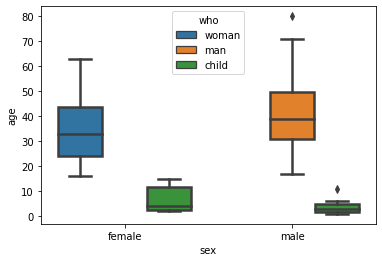

In [134]:
a1 = sns.boxplot(x="sex", y="age", hue="who",
                data=a, linewidth=2.5)

<AxesSubplot:xlabel='age', ylabel='fare'>

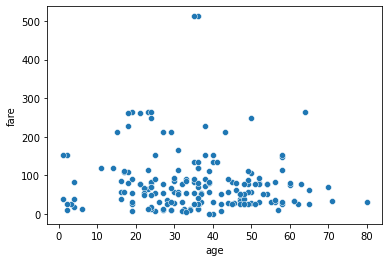

In [135]:
sns.scatterplot(x='age',y='fare', data=a)

<AxesSubplot:xlabel='pclass', ylabel='age'>

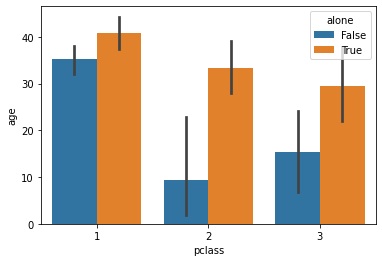

In [136]:
sns.barplot(x='pclass',y='age', hue="alone",
                data=a, linewidth=2.5)

#### Question 8

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
x = a[['pclass', 'age', 'parch', 'fare']].values
y = a[['survived']].values
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

In [153]:
# Fitting logistic regression
classifier = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class ='auto')
classifier.fit (X_train,Y_train)

LogisticRegression(random_state=0)

In [158]:
X_test

array([[  1.    ,  25.    ,   0.    ,  91.0792],
       [  1.    ,  47.    ,   0.    ,  52.    ],
       [  1.    ,  58.    ,   0.    , 146.5208],
       [  1.    ,  54.    ,   0.    ,  78.2667],
       [  1.    ,  26.    ,   0.    ,  30.    ],
       [  1.    ,  39.    ,   0.    ,   0.    ],
       [  1.    ,  19.    ,   2.    , 263.    ],
       [  1.    ,  15.    ,   1.    , 211.3375],
       [  1.    ,  40.    ,   1.    , 134.5   ],
       [  1.    ,  24.    ,   0.    ,  69.3   ],
       [  2.    ,  34.    ,   0.    ,  13.    ],
       [  1.    ,  48.    ,   0.    ,  39.6   ],
       [  1.    ,  47.    ,   1.    ,  52.5542],
       [  1.    ,  24.    ,   0.    ,  69.3   ],
       [  1.    ,  29.    ,   0.    ,  30.    ],
       [  1.    ,  27.    ,   0.    ,  53.1   ],
       [  1.    ,  36.    ,   0.    ,  40.125 ],
       [  1.    ,  44.    ,   1.    ,  57.9792],
       [  1.    ,  33.    ,   0.    ,  90.    ],
       [  1.    ,  70.    ,   1.    ,  71.    ],
       [  2.    ,  2

In [157]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [162]:
a=np.array([2,50,2,100]).reshape(1,-1)
classifier.predict(a)

array([0], dtype=int64)

# Accuracy

In [165]:
accuracy_score(Y_test,y_pred)

0.7391304347826086

# Matrix confusion

b=confusion_matrix(Y_test,y_pred)

<AxesSubplot:>

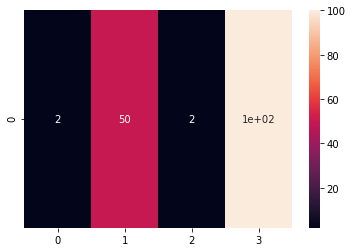

In [173]:
sns.heatmap(a,annot=True)